Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 572)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 512)                 │         293,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 441,282 (1.68 MB)

 Trainable params: 441,282 (1.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6501 - loss: 13.3231 - val_accuracy: 0.7320 - val_loss: 14.2871
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7863 - loss: 7.9796 - val_accuracy: 0.6701 - val_loss: 3.6159
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8347 - loss: 2.8026 - val_accuracy: 0.8557 - val_loss: 2.4623
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8695 - loss: 1.4058 - val_accuracy: 0.9381 - val_loss: 0.5270
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9306 - loss: 0.4448 - val_accuracy: 0.9588 - val_loss: 0.1933
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9753 - loss: 0.1009 - val_accuracy: 0.9588 - val_loss: 0.2242
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9826 - loss: 0.0409 - val_accuracy: 0.9485 - val_loss: 0.3369
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9693 - loss: 0.1146 - val_accuracy: 0.9691 - val_loss: 0.119

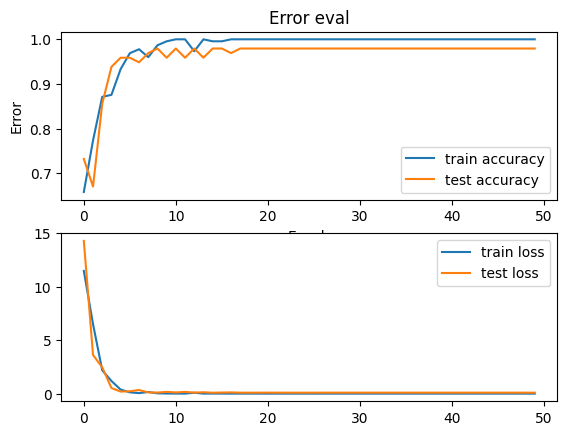

In [18]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
#load data
DATASET_PATH="/content/drive/MyDrive/Colab Notebooks/piping_database/beesmfccs.json"
def load_data(dataset_path):
  with open(dataset_path, 'r') as fp:
    data = json.load(fp)

    #covert list into numpyy array
    inputs=np.array(data["mfcc"])
    targets=np.array(data["labels"])

    return inputs, targets
def plot_history(history):
  fig,axs = plt.subplots(2)


  #create accuracy subplot
  axs[0].plot(history.history["accuracy"], label="train accuracy")
  axs[0].plot(history.history["val_accuracy"], label="test accuracy")
  axs[0].legend(loc="lower right")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Accuracy")
  axs[0].set_title("Accuracy eval")

  axs[1].plot(history.history["loss"], label="train loss")
  axs[1].plot(history.history["val_loss"], label="test loss")
  axs[1].legend(loc="upper right")
  axs[0].set_xlabel("Epoch")
  axs[0].set_ylabel("Error")
  axs[0].set_title("Error eval")
  plt.show()

if __name__ == "__main__":

  inputs, targets =load_data(DATASET_PATH)
  #split data into train & test
  inputs_train,inputs_test, targets_train, targets_test=train_test_split(inputs, targets, test_size=0.3)


  #build the network architecture
  model=keras.Sequential([
      #input layer
      keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
      #1st hidden layer
      keras.layers.Dense(512, activation='relu'),
      #2nd hidden layer
      keras.layers.Dense(256, activation='relu'),
      #3rd hidden layer
      keras.layers.Dense(64, activation='relu'),
      #output layer
      keras.layers.Dense(2, activation='softmax')
  ])



#compile network
  optimizer=keras.optimizers.Adam(learning_rate=0.0001)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

#train network
history= model.fit(inputs_train,targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)

plot_history(history)
